# HOMEWORK 8

In this homework you are going to implement your first machine learning algorithm to automatically binarize document images. The goal of document binarization is to seprate the characters (letters) from everything else. This is the crucial part for automatic document understanding and information extraction from the . In order to do so, you will use the Otsu thresholding algorithm.

At the end of this notebook, there are a couple of questions for you to answer.

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Let's load the document image we will be working on in this homework.

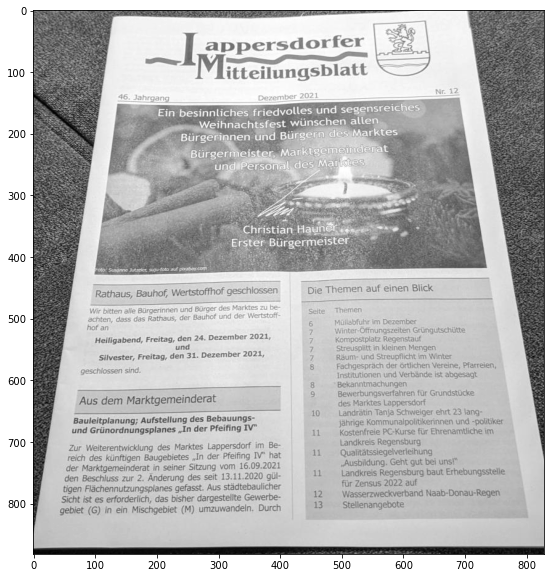

In [2]:
img = cv2.imread('../data/document.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')


First, let's have a look at the histogram.

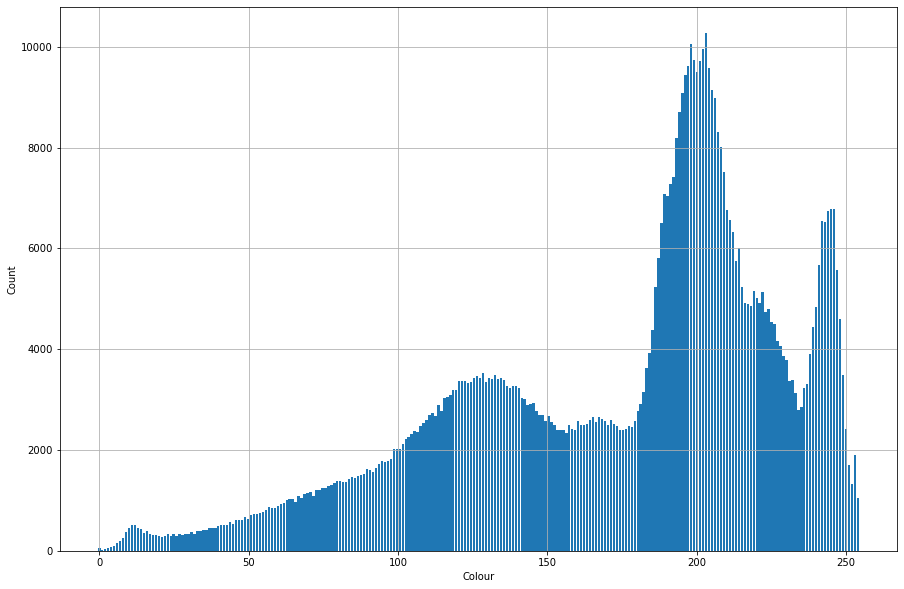

In [3]:
h = np.histogram(img, 256)
plt.bar(h[1][0:-1], h[0])
plt.xlabel('Colour'), plt.ylabel('Count')
plt.grid(True)


### Otsu Thresholding

Let's now implement the Otsu thresholding algorithm. Remember that the algorithm consists of an optimization process that finds the thresholds that minimizes the intra-class variance or, equivalently, maximizes the inter-class variance.

In this homework, you are going to demonstrate the working principle of the Otsu algorithm. Therefore, you won't have to worry about an efficient implementation, we are going to use the brute force approach here.

In [4]:
# Get image dimensions
rows, cols = img.shape
# Compute the total amount of image pixels
num_pixels = rows*cols

# Initializations
best_wcv = 1e6  # Best within-class variance (wcv)
opt_th = None   # Threshold corresponding to the best wcv

# Brute force search using all possible thresholds (levels of gray)
for th in range(0, 255):
    # Extract the image pixels corresponding to the background
    foreground = img[img>=th]
    # Extract the image pixels corresponding to the background
    background = img[img<th]
    
    # If foreground or background are empty, continue
    if len(foreground) == 0 or len(background) == 0:
        continue
    
    # Compute class-weights (omega parameters) for foreground and background
    omega_f = len(foreground)/num_pixels
    omega_b = len(background)/num_pixels
    
    # Compute pixel variance for foreground and background
    # Hint: Check out the var function from numpy ;-)
    # https://numpy.org/doc/stable/reference/generated/numpy.var.html
    sigma_f = np.var(foreground)
    sigma_b = np.var(background)
    
    # Compute the within-class variance
    wcv = np.sqrt(omega_f * sigma_f**2 + omega_b * sigma_b**2)
    
    # Perform the optimization
    if wcv < best_wcv:
        best_wcv = wcv
        opt_th = th
        
# Print out the optimal threshold found by Otsu algorithm
print('Optimal threshold', opt_th)

Optimal threshold 152


Finally, let's compare the original image and its thresholded representation.

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f94dd6d3550>)

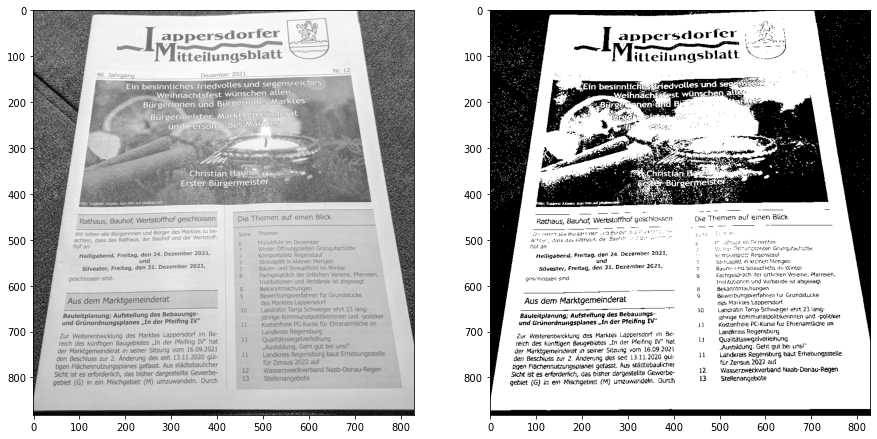

In [5]:
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(img > opt_th, cmap='gray')

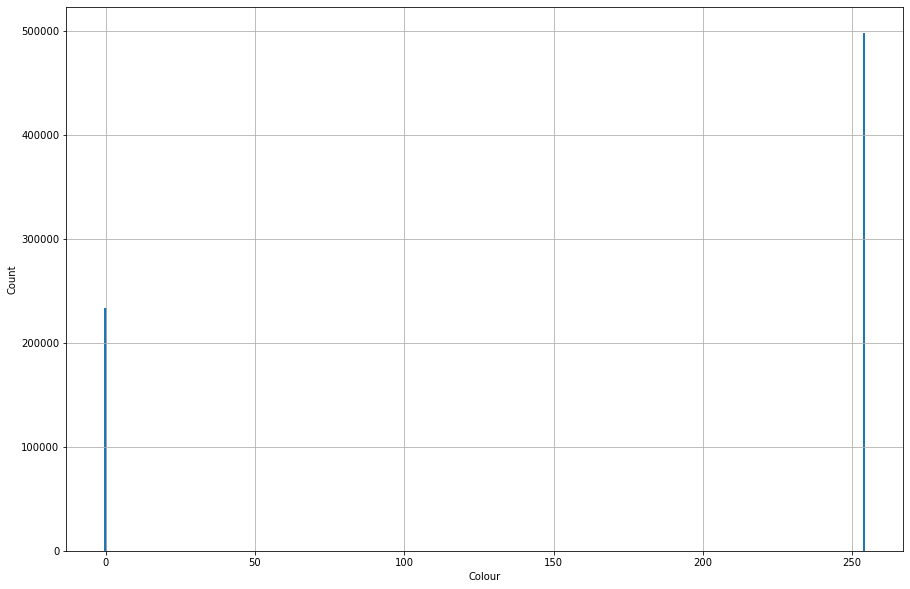

In [6]:
img[img >= opt_th] = 255
img[img < opt_th] = 0

h = np.histogram(img, 256)
plt.bar(h[1][0:-1], h[0])
plt.xlabel('Colour'), plt.ylabel('Count')
plt.grid(True)


### Let's play with threshold (take it quite small)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f94dd94fbe0>)

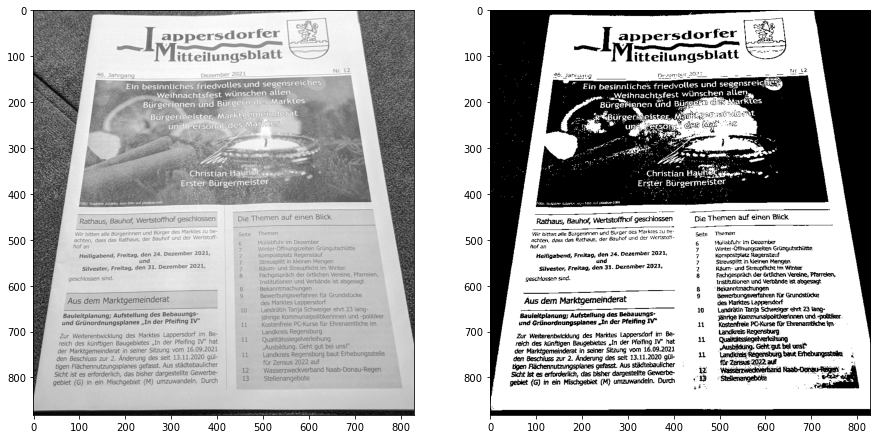

In [7]:
img2 = cv2.imread('../data/document.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

opt_th = 180

plt.subplot(121), plt.imshow(img2, cmap='gray')
plt.subplot(122), plt.imshow(img2 > opt_th, cmap='gray')



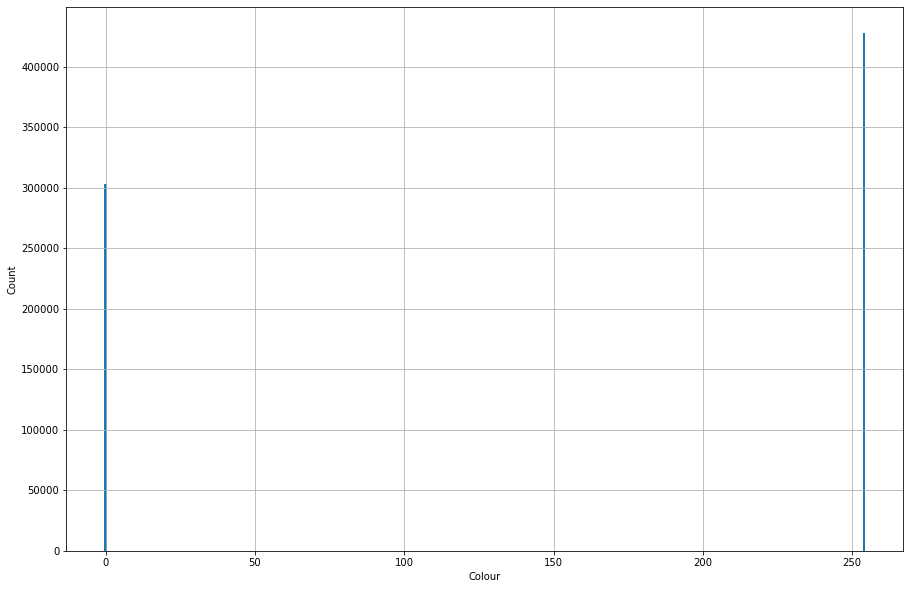

In [8]:
img2[img2 >= opt_th] = 255
img2[img2 < opt_th] = 0

h = np.histogram(img2, 256)
plt.bar(h[1][0:-1], h[0])
plt.xlabel('Colour'), plt.ylabel('Count')
plt.grid(True)



### Let's compare with opencv implementation of the OTSU

Obtained threshold:  159.0


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f94dd1479d0>)

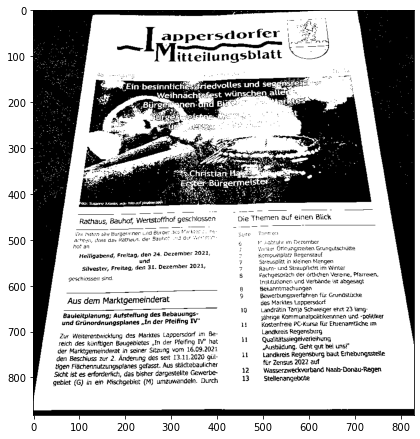

In [9]:
img3 = cv2.imread('../data/document.jpg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

otsu_threshold, img_otsu = cv2.threshold(img3, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print("Obtained threshold: ", otsu_threshold)
plt.subplot(122), plt.imshow(img_otsu, cmap='gray')

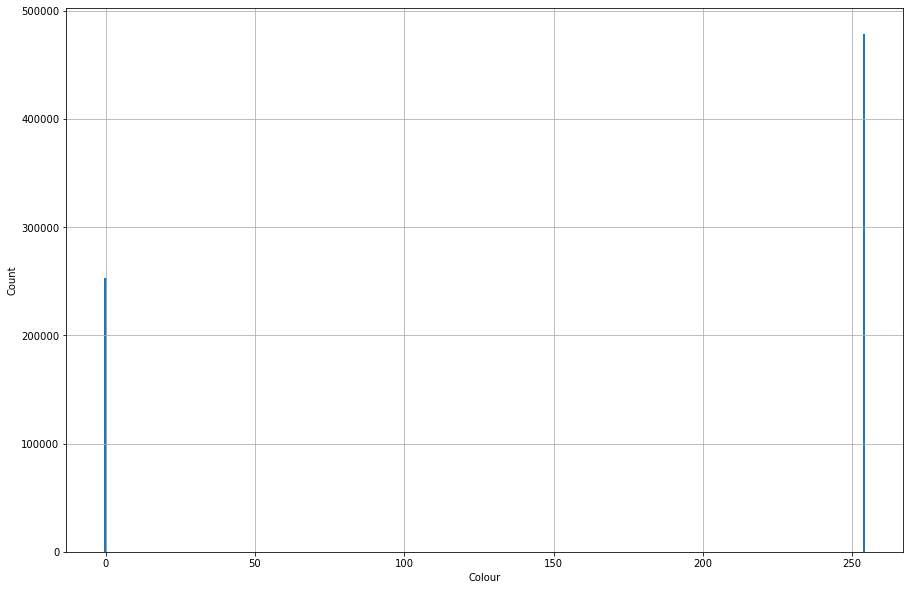

In [10]:
h = np.histogram(img_otsu, 256)
plt.bar(h[1][0:-1], h[0])
plt.xlabel('Colour'), plt.ylabel('Count')
plt.grid(True)

### Questions

* Looking at the computed histogram, could it be considered bimodal?
* Looking at the computed histogram, what binarization threshold would you chose? Why?
* Looking at the resulting (thresholded) image, is the text binarization (detection) good?

### Answers

* Looking at the computed histogram, could it be considered bimodal?
-- Думаю, да, так как цвета распределены по двум бакетам: 0 и 255
* Looking at the computed histogram, what binarization threshold would you chose? Why?
* Looking at the resulting (thresholded) image, is the text binarization (detection) good?
-- В целом хорошая, но некоторые части текста получились белыми (сверху столбцов). 
На оригинальной страничке мы видим, что они видны лучше (на сероватом фону).
С другой, стороны, если увеличивать вручную трешолд, то остальной текст может быть хуже читаем 
(например, я игрался со значением 180).
Также сверху на картинке есть текст, но он белый на темном фоне, наверное, там в идеале должна быть применена обратная бинаризация, 
чтобы текст выделился черным. По идее, мы можем посчитать количество соотношение "светлых" и "темных" пикселов. 
Если темных намного больше, то значит, что фон темный, а текст белый.